<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate rectangle detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
# Import all necessary libraries.
import os
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load default configuration file.
NOMEROFF_NET_DIR = "../"
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, "Mask_RCNN/")
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")

sys.path.append(NOMEROFF_NET_DIR)

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters, RectDetector

Using TensorFlow backend.
W0708 18:45:49.592047 139765705790784 deprecation_wrapper.py:119] From ../NomeroffNet/Detector.py:12: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0708 18:45:49.592957 139765705790784 deprecation_wrapper.py:119] From ../NomeroffNet/Detector.py:14: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [4]:
# Initialize rect detector with default configuration.
rectDetector = RectDetector()
# Initialize npdetector with default configuration.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
# Load weights in keras format.
nnet.loadModel("latest")

W0708 18:45:49.961969 139765705790784 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 18:45:49.965406 139765705790784 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 18:45:49.968087 139765705790784 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 18:45:49.989783 139765705790784 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0708 18:45:49.992260 1

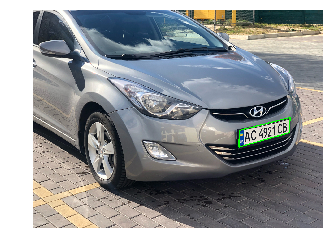

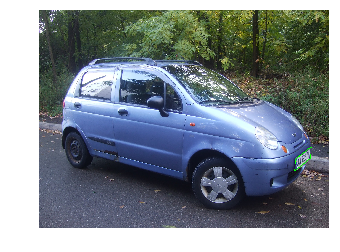

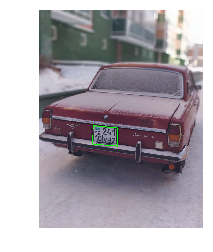

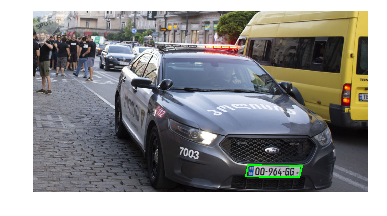

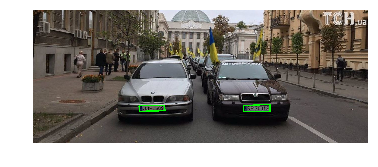

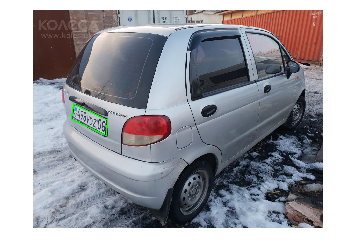

In [5]:
rootDir = "images/"
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        NP = nnet.detect([img])
        
        # Generate image mask.
        cv_img_masks = filters.cv_img_mask(NP) 
       
        res = []
        # Detect points.
        arrPoints = rectDetector.detect(cv_img_masks)
            
        filters.draw_box(img, arrPoints, (0, 255, 0), 3)
        plt.axis("off")
        plt.imshow(img)
        plt.show()